# Nose to Time Series 

## Time Series

## Time Series Analysis

## Objectives

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
import pandas as pd
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%y')
data = pd.read_csv('StockPrice.csv', header = 0)
data.head()

In [ ]:
data.info()

In [ ]:
# Take a look at the indices
data.index

RangeIndex(start=0, stop=504, step=1)

In [ ]:
reducedData = data.iloc[:,[2,5]]

In [ ]:
reducedData['AveragePrice'] = (reducedData['open'] + reducedData['close'])/2

In [ ]:
reducedData.head()

In [ ]:
myPrice = reducedData.loc[:,'AveragePrice']
myPrice.head()

In [ ]:
plt.plot(myPrice)

## Components of a Time series

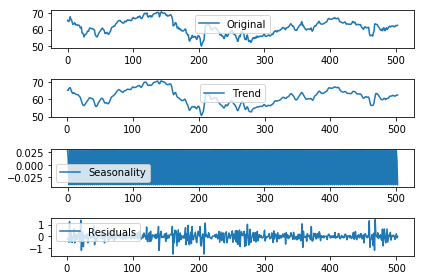

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(myPrice, freq = 3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(myPrice, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Normality test

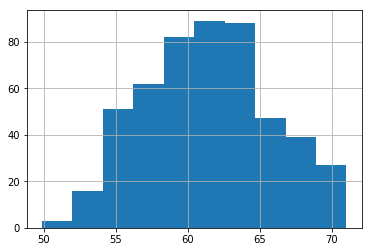

In [ ]:
from pandas import Series
from matplotlib import pyplot
myPrice.hist()
pyplot.show()

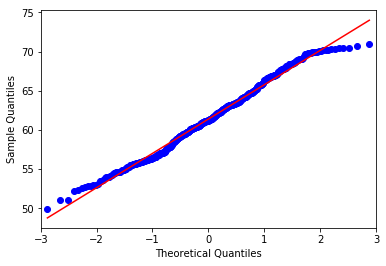

In [ ]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice, line='s')
pyplot.show()

## Shapiro Test

In [ ]:
from scipy.stats import shapiro

In [ ]:
def shapiroTest(ts):
    val = shapiro(ts)
    statistic = round(val[0],3)
    pval = round(val[1],3)
    criticalVal = 0.05
    if pval > criticalVal:
        print('a Gaussian case')
    else:
        print('a non Gaussian case')

In [ ]:
shapiroTest(myPrice)

a non Gaussian case


## Stationarity

In [ ]:
# Let us investigate if the mean and the varianne of the series change through time
def rolling_Mean_STD(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    
    rolstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


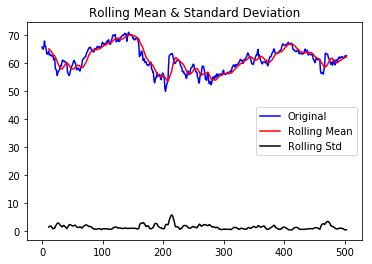

In [ ]:
rolling_Mean_STD(myPrice)

In [ ]:
ts = myPrice

In [ ]:
ts.loc[:'AveragePrice']

0      65.7550
1      65.0750
2      64.9750
3      65.7500
4      67.8950
5      66.2350
6      66.0500
7      64.5550
8      63.1600
9      63.4450
10     63.7450
11     64.2550
12     62.9000
13     63.0900
14     63.0450
15     62.5450
16     62.7150
17     62.6450
18     62.6200
19     61.2200
20     61.0950
21     61.6250
22     57.9300
23     57.7675
24     57.3050
25     55.5750
26     56.4100
27     57.0250
28     57.2250
29     57.7000
        ...   
474    61.7250
475    61.0850
476    60.5600
477    59.7100
478    59.4950
479    60.2750
480    59.2950
481    60.6450
482    61.2150
483    59.9950
484    59.3100
485    60.2300
486    61.1900
487    60.1250
488    60.4600
489    61.3650
490    61.7850
491    62.1600
492    61.6100
493    61.9100
494    62.1700
495    62.2950
496    62.2500
497    61.8375
498    61.6200
499    62.0600
500    62.5100
501    62.3900
502    62.5600
503    62.6745
Name: AveragePrice, Length: 504, dtype: float64

In [ ]:
def mean_checker(timeSeries):
    thres = int(len(timeSeries)/3)
    firstPart = timeSeries[1:thres]
    secondPart = timeSeries[(thres+1):(2*thres)]
    thirdPart = timeSeries[(2*thres+1):]
    
    print('the length of the first part is',len(firstPart))
    print('the length of the second part is',len(secondPart))
    print('the length of the third part is',len(thirdPart))
    
    print('-------------------------------------------------')
    firstMean = firstPart.mean()
    secondMean = secondPart.mean()
    thirdMean = thirdPart.mean()
    
    print('--------------------------------------------------')
    print('The mean of the first part is',firstMean)
    print('The mean of the second part is',secondMean)
    print('The mean of the third part is',thirdMean)

In [ ]:
mean_checker(ts)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
-------------------------------------------------
--------------------------------------------------
The mean of the first part is 64.27929640718564
The mean of the second part is 57.31086826347306
The mean of the third part is 62.533215568862275


In [ ]:
# What other way can you use to see if the series is stationary or not?
# write a function called std_checker

In [ ]:
# let us use the Duckey Fuller Test
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
stationarity_test(myPrice)

Results of Dickey-Fuller Test:
Test Statistic                  -2.021557
p-value                          0.277202
#Lags Used                       8.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


## Make The Series Stationary

In [ ]:
# Let's us try to make the series stationary. For, we need to applay some transformation

### Log Transformation

In [ ]:
logTs = np.log(ts)

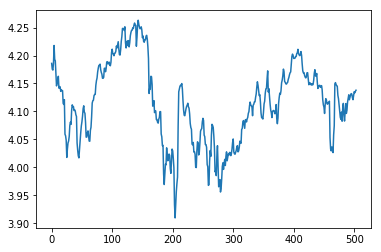

In [ ]:
plt.plot(logTs)

In [ ]:
# apply the rolling_Mean_STD to the log

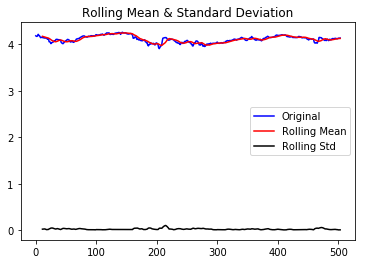

In [ ]:
rolling_Mean_STD(logTs)

In [ ]:
# apply the function mean_checker

In [ ]:
mean_checker(logTs)

the length of the first part is 167
the length of the second part is 167
the length of the third part is 167
-------------------------------------------------
--------------------------------------------------
The mean of the first part is 4.1609802620079455
The mean of the second part is 4.047325940281941
The mean of the third part is 4.134980982211961


In [ ]:
# apply the Duckey Fuller test

### Differencing

In [ ]:
# similar thing could be done by differencing the series

In [ ]:
#Take first difference:
differencedSeries = ts - ts.shift()
differencedSeries

0         NaN
1     -0.6800
2     -0.1000
3      0.7750
4      2.1450
5     -1.6600
6     -0.1850
7     -1.4950
8     -1.3950
9      0.2850
10     0.3000
11     0.5100
12    -1.3550
13     0.1900
14    -0.0450
15    -0.5000
16     0.1700
17    -0.0700
18    -0.0250
19    -1.4000
20    -0.1250
21     0.5300
22    -3.6950
23    -0.1625
24    -0.4625
25    -1.7300
26     0.8350
27     0.6150
28     0.2000
29     0.4750
        ...  
474   -0.3800
475   -0.6400
476   -0.5250
477   -0.8500
478   -0.2150
479    0.7800
480   -0.9800
481    1.3500
482    0.5700
483   -1.2200
484   -0.6850
485    0.9200
486    0.9600
487   -1.0650
488    0.3350
489    0.9050
490    0.4200
491    0.3750
492   -0.5500
493    0.3000
494    0.2600
495    0.1250
496   -0.0450
497   -0.4125
498   -0.2175
499    0.4400
500    0.4500
501   -0.1200
502    0.1700
503    0.1145
Name: AveragePrice, Length: 504, dtype: float64

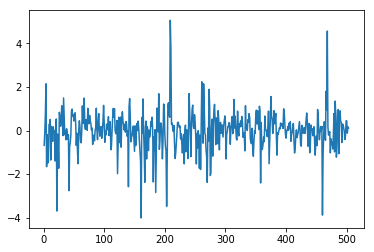

In [ ]:
differencedSeries.dropna(inplace = True)
plt.plot(differencedSeries)

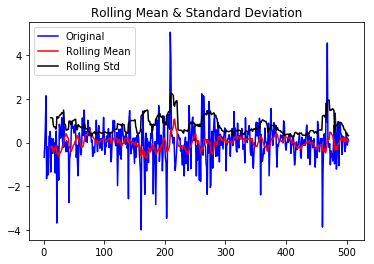

In [ ]:
# Let us apply our rolling_Mean_STD(logTs)
rolling_Mean_STD(differencedSeries)

In [ ]:
mean_checker(differencedSeries)

the length of the first part is 166
the length of the second part is 166
the length of the third part is 168
-------------------------------------------------
--------------------------------------------------
The mean of the first part is -0.025060240963855444
The mean of the second part is 0.00021084337349395535
The mean of the third part is 0.007705357142857096


In [ ]:
# Duckey fuller test

## Time Series forecasting

### ARIMA, benchmark model in time Series

### Introduction to autocorrelation function(ACF)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf  

Text(0.5,1,'Autocorrelation Function')

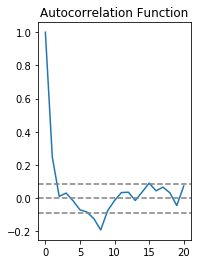

In [ ]:
acValues = acf(differencedSeries, nlags=20)
#Plot ACF:    
plt.subplot(121)    
plt.plot(acValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


### Introduction to Partial autocrrelation function(PACF)

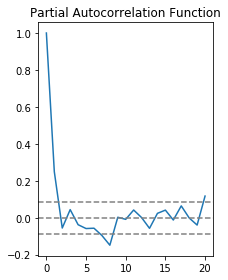

In [ ]:
pacValues = pacf(differencedSeries, nlags=20, method='ols')
plt.subplot(122)
plt.plot(pacValues)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### Use of ACF and PACF

### A More rigourous way of selecting the best Models

In [ ]:
# As mentioned earlier, an arima model is defined by p,d, and q; which constitue the order 
# of any given arima model. In order to avoid a tiresome trials and errors attempts, let us
# do a grid search work. This aims at giving a range of values to p, a range of values to d
# and a range of values to d. Once those values are defined, we can construct different (p,d,q)

In [ ]:
# This function takes three lists and create a bigger list that will contain all the 
# possible three combinations we can create from those three lists.
def comb_p_d_q(pVals,dVals,qVals):
    return [(p,d,q) for p in pVals for d in dVals for q in qVals]
    

In [ ]:
comb_p_d_q([0,1,2],[0,1,2],[0,1,2])

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def aic_finder(ts, model_order):
    model = ARIMA(ts, order= model_order)
    model_fit = model.fit(disp=0)
    aicval = model_fit.aic
    if np.isfinite(aicval):
        return aicval
    else:
        return 9999

In [ ]:
aic_finder(myPrice.values,(2,0,1))

1272.155507894635

In [ ]:
# Suppose that we have a given list of orders. Our task is to find the order that fit the 
# best our data. For each of the order in our list, we will fit the model, extract the aics.
# then, find the model that give us the smallest aic. The found model will be  considered 
# to be the best model.

In [ ]:
def bestModel(timeseries,pVals,dVals,qVals):
    all_models = comb_p_d_q(pVals,dVals,qVals)
    
    # Let us work on  the partition of the series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    aicVals = []
    
    for elem in all_models:
        mm = aic_finder(trainSet,elem)
        aicVals.append(mm)
    print('The list of aic is:', aicVals)
    print(' ')
    minVals = min(aicVals)
    print('The smallest aic value is ', minVals)
    locMin = aicVals.index(minVals)
    print('The location of the smallest value of aicVals is', locMin)
    print('The corresponding model is : ', all_models[locMin])

    

In [ ]:
bestModel(myPrice.values,[1,2],[1,2],[1,2])

The list of aic is: [984.6287765903489, 985.1931439071891, 990.6932644216788, 990.23080828658, 986.2648882615125, 988.1317569111344, 991.3111166550933, 991.8240673821718]
 
The smallest aic value is  984.6287765903489
The location of the smallest value of aicVals is 0
The corresponding model is :  (1, 1, 1)


In [ ]:
# As mentioned earlier, forecasting is a key step of time series analysis. Thus, let us
# try to do some forecasting. This will be done by using the best model, we found.
from sklearn.metrics import mean_squared_error
def prediction(timeseries, order):
    from sklearn.metrics import mean_squared_error
    # Let us work on  the partition of the series
    l = len(timeseries)
    trainSize = int(l*0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[(trainSize+1):]
    
    print('The length of the train set is',len(trainSet))
    print('The length of the test set is',len(testSet))
    
    trainSet = list(trainSet)
    predictedValues = list()
    g = lambda x: x[0]
    for i in range(len(testSet)):
        model = ARIMA(trainSet, order=order)
        model_fit = model.fit(disp=0)
        predictedVal = list(model_fit.forecast()[0])
        predictedVal = g(predictedVal)
        predictedValues.append(predictedVal)
        trainSet.append(predictedVal)

    print('The predicted values are:')
    print(' ')
    print(predictedValues)
    
    print('----------------------------------------------------------------------------')
    print('The length of the list that contains the predicted values is',len(predictedValues))
    print('----------------------------------------------------------------------------')
    
    print('How much error we have made')
    error = mean_squared_error(testSet, predictedValues)
    print('The  forecat erros is ', error)

    return(predictedValues)

In [ ]:
testVal = prediction(myPrice.values,(1,1,1))

The length of the train set is 378
The length of the test set is 125
The predicted values are:
 
[62.45838027436054, 62.43817977624329, 62.429971404220304, 62.420686205524284, 62.41149778409309, 62.40230062487488, 62.39310426103694, 62.38390782580668, 62.37471138413752, 62.3655149431134, 62.356318510922456, 62.34712206870961, 62.337925611019735, 62.32872916226968, 62.319532703182276, 62.310336241181965, 62.301139766206425, 62.291943294984755, 62.28274682172409, 62.2735503323951, 62.26435386067531, 62.25515738412853, 62.245960902964406, 62.23676442355392, 62.22756792883677, 62.21837143333941, 62.209174943620496, 62.199978443541845, 62.19078194160654, 62.181585422438516, 62.17238890473687, 62.16319237251567, 62.15399584753846, 62.14479930999349, 62.13560276989062, 62.12640624897326, 62.11720972292481, 62.10801320180262, 62.098816666688556, 62.089620134697995, 62.08042358656997, 62.0712270371654, 62.062030484630334, 62.05283393975678, 62.04363739012958, 62.034440841161405, 62.025244287785